# Data Generation and Model Training

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier

# Generate a random binary classification data.
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=3., random_state=12)

model = SGDClassifier(loss='hinge', penalty='l2', alpha=0.001, max_iter=2000, tol=0.0001, random_state=23)
model.fit(X, y)

SGDClassifier(alpha=0.001, max_iter=2000, random_state=23, tol=0.0001)

# Data Visualization and Decision Boundary Plotting

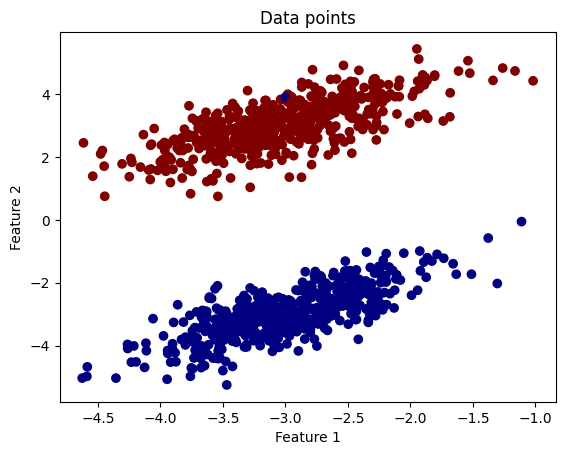

In [14]:
# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet')
plt.title("Data points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

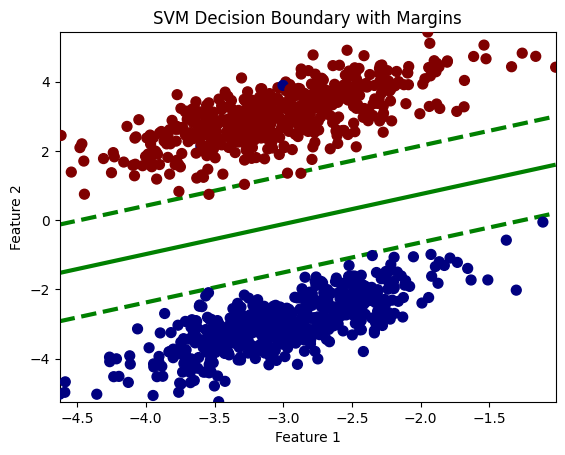

In [4]:
import matplotlib.pyplot as plt
import numpy as np


def plot_decision_boundary(X, y, model):
    num_points = 1000
    x_min = X.min(axis=0)
    x_max = X.max(axis=0)
    feature1_range = np.linspace(x_min[0], x_max[0], num_points)
    feature2_range = np.linspace(x_min[1], x_max[1], num_points)
    feature1_mesh, feature2_mesh = np.meshgrid(feature1_range, feature2_range)

    mesh_points = np.stack((feature1_mesh.flatten(), feature2_mesh.flatten()), axis=1)
    decision_values = model.decision_function(mesh_points)
    decision_values = decision_values.reshape(feature1_mesh.shape)

    plt.contour(feature1_mesh, feature2_mesh, decision_values, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)
    plt.title("SVM Decision Boundary with Margins")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


# Call the function
plot_decision_boundary(X, y, model)

## Code With Showing Support Vectors

# Class to handle different SVM models

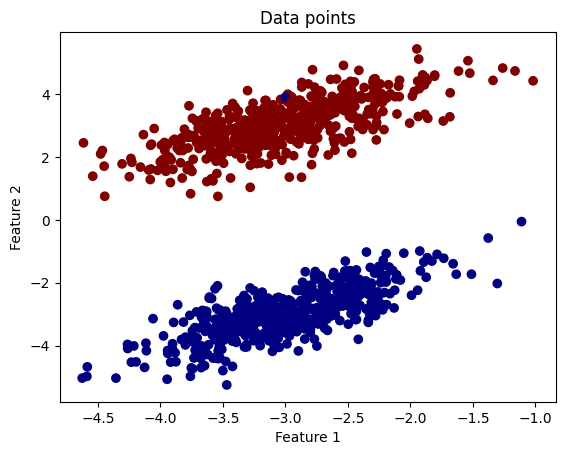

Using model: SGDClassifier


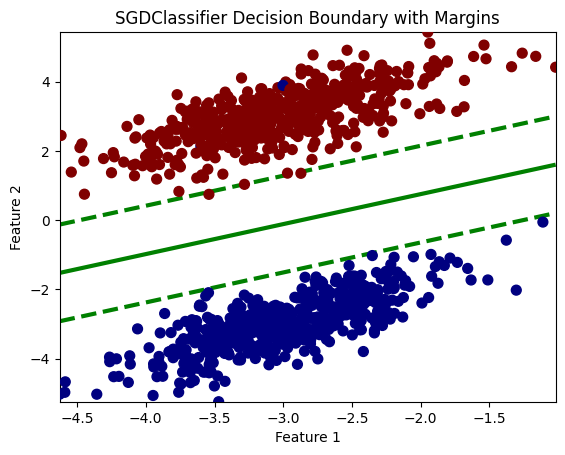

Using model: LinearSVC


/home/ebrahim/miniconda3/envs/pytorch23/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


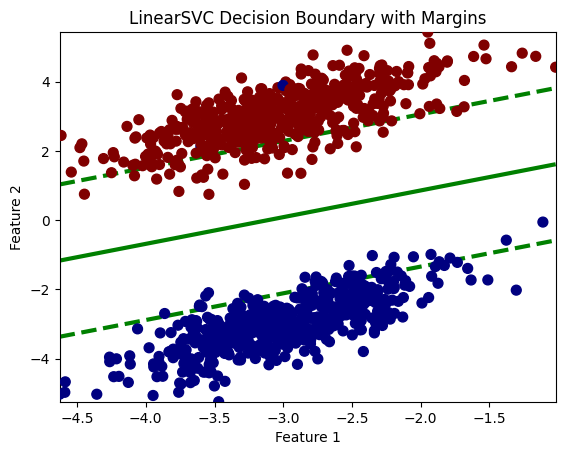

Using model: SVC


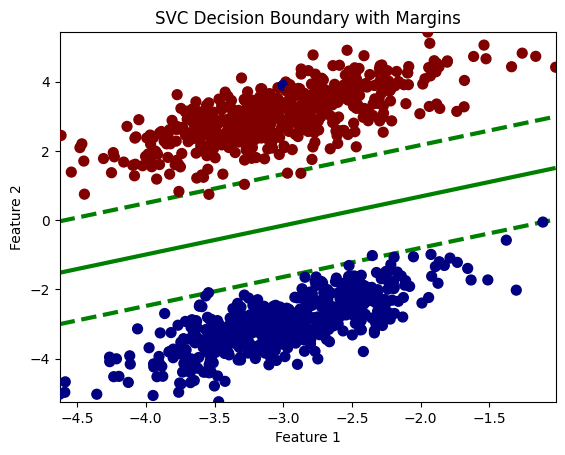

Using model: NuSVC


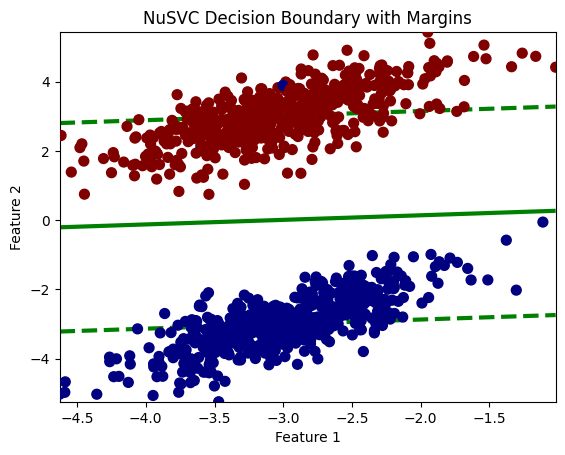

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC, SVC, NuSVC

class SVMVisualizer:
    def __init__(self, model, model_name):
        self.model = model
        self.model_name = model_name

    def fit(self, X, y):
        self.model.fit(X, y)

    def plot_decision_boundary(self, X, y):
        n = 1000
        xmin = X.min(0)
        xmax = X.max(0)
        x1r = np.linspace(xmin[0], xmax[0], n)
        x2r = np.linspace(xmin[1], xmax[1], n)
        x1m, x2m = np.meshgrid(x1r, x2r)

        Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
        ym = self.model.decision_function(Xm)
        ym = ym.reshape(x1m.shape)

        plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)
        plt.title(f"{self.model_name} Decision Boundary with Margins")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

# Generate a random binary classification problem.
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=3., random_state=12)

# Instantiate different SVM models
models = {
    'SGDClassifier': SGDClassifier(loss='hinge', penalty='l2', alpha=0.001, max_iter=2000, tol=0.0001, random_state=23),
    'LinearSVC': LinearSVC(C=1.0, max_iter=2000, tol=0.0001, random_state=23),
    'SVC': SVC(kernel='linear', C=1.0, random_state=23),
    'NuSVC': NuSVC(kernel='linear', nu=0.5, random_state=23)
}

# Plot the data points once
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet')
plt.title("Data points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Visualize each model
for name, model in models.items():
    print(f"Using model: {name}")
    visualizer = SVMVisualizer(model, name)
    visualizer.fit(X, y)
    visualizer.plot_decision_boundary(X, y)